In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

import heat_equations as PDE

## Nomenclature and PDE Types
# $u= u(t,x)$,  $u_{x} = \frac{\partial{u}}{\partial{x}}$,  $u_{xx}=\frac{\partial^2{u}}{\partial{x}^2}$, $u_{t} = \frac{\partial{u}}{\partial{t}}$,  $u_{tt}=\frac{\partial^2{u}}{\partial{t}^2}$

## $Au_{xx} + Bu_{xt} + Cu_{tt} + Du_{x} + Eu_{t} + Fu = G$

### $B^2 - 4AC$:
1. $= 0: Elliptical PDE$
2. $< 0: Hyperbolic PDE$
3. $> 0: Parabolic PDE$

-----

#### Using a common set of initial conditions for first few examples:

In [10]:
# Initial Condition Functions
def f_u_0_x(x):
    '''
    Assigns the initial values (t=0) for u, inner nodes.
    If the initial value is a constant, leave function as-is.
    If the initial value is a function of x, replace return value with function.
    
    Parameters: t = time [Float] 
    '''
    return x*(x-1)*(x-3)

def f_u_t_0(t):
    '''
    Assigns the initial value for the 0-boundary.
    If the boundary is a constant value, leave function as-is.
    If boundary is a function of t, replace return value with function.
    
    Parameters: t = time [Float]    
    '''    
    return 0

def f_u_t_L(t):
    '''
    Assigns the initial value for the L-boundary.
    If the boundary is a constant value, leave function as-is.
    If boundary is a function of t, replace return value with function.
    
    Parameters: t = time [Float] 
    '''
    return 0

## 1. Laplace: $u_{xx} = 0$

*Note: Laplace is the wave equation with constant t and no $c^2$ term.*

In [ ]:
'''
This block old work kept - likely need implicit method 

## Set the 1D mesh
# Select L and dx to examine
L = 3
dx = .04

# These are calculated
Nx = int(L/dx) + 1
x_grid = np.linspace(0,L,Nx)

# These are required since time is constant
t_max = 1
t_min_plot = 0
t_max_plot = 
'''

## 2. Poisson: $u_{xx} = u$
Note: Often given as $-u_{xx} = f$

## 3a. Transport (w/o decay/growth): $u_{t} + cu_{x} = 0, \tiny\text{where c = a constant}$

Explicit:

In [ ]:
# Create explicit function
def transport_1D_explicit(u_line,c,m,dt,dx):
    '''
    Takes in:
    u_line - an 1D array
    m - a space index
    dt - time step
    dx - x step
    '''
    return  c * (dt/(2*dx)) * (u_line[m-1] - u_line[m+1]) + u_line[m]

In [ ]:
# -- User Defined - IC and Boundary condition functions determined at start of notebook
L_3 = 3
t_max_3 = 1

dx_3 = .1
dt_3 = .00001

c_3 = .05

# -- Calculated
Nx_3 = int(L_3/dx_3) + 1
Nt_3 = int(t_max_3/dt_3)

x_grid_3 = np.linspace(0,L_3,Nx_3)
t_grid_3 = np.linspace(0,t_max_3,Nt_3)

# -- Create solution data holder
U_3 = []

# -- Append initial conditions (t = 0)
u_t_x_0 = []

for x in x_grid_3:
    u_t_x_0.append(f_u_0_x(x))

u_t_x_0[0] = f_u_t_0(0)
u_t_x_0[-1] = f_u_t_L(0)

U_3.append(u_t_x_0)

for j in range(len(t_grid_3)):
    u_t_x = []
    
    u_previous = U_3[-1]
    
    for m in range(1,len(x_grid_3)-1):
        # Equation 5.14 (slightly modified) to calculate u at each x value:
        #! - Note: can use classes or other methods to choose which function is used
        u = transport_1D_explicit(u_previous,c_3,m,dt_3,dx_3)
        # Append this value to the time step line
        u_t_x.append(u)

    # Append the first and last value with boundary conditions (0 in this case)
    u_t_x.insert(0,f_u_t_0(j*dt_3))
    u_t_x.append(f_u_t_L(j*dt_3))

    # Now append the full solutions matrix
    U_3.append(u_t_x) 

In [ ]:
steps = 20
t_min_plot = 0
t_max_plot = len(U_3)
x_min_plot = 0
x_max_plot = L_3
PDE.PDE_plotter_1D(U_3, L_3, t_max_3, steps, t_min_plot, t_max_plot, x_min_plot, x_max_plot, style='heat')

#### CR Method:

## 3b. Transport w/ decay/growth: $u_{t} + cu_{x} = u, \tiny\text{where c = a constant}$

## 4.  Nonlinear Transport (Inviscid Burgers): $u_{t} + (u)u_{x} = 0$

In [ ]:
# Create explicit function
def invisic_burgers_1D_explicit(u_line,m,dt,dx):
    '''
    Takes in
    u_line - an 1D array
    m - a space index
    dt - time step
    dx - x step
    '''
    return  u_line[m] * ((dt/(2*dx)) * (u_line[m-1] - u_line[m+1]) + 1)

In [ ]:
# -- User Defined - IC and Boundary condition functions determined at start of notebook
L_4 = 3
t_max_4 = 1

dx_4 = .1
dt_4 = .00001

# -- Calculated
Nx_4 = int(L_4/dx_4) + 1
Nt_4 = int(t_max_4/dt_4)

x_grid_4 = np.linspace(0,L_4,Nx_4)
t_grid_4 = np.linspace(0,t_max_4,Nt_4)

# -- Create solution data holder
U_4 = []

# -- Append initial conditions (t = 0)
u_t_x_0 = []

for x in x_grid_4:
    u_t_x_0.append(f_u_0_x(x))

u_t_x_0[0] = f_u_t_0(0)
u_t_x_0[-1] = f_u_t_L(0)

U_4.append(u_t_x_0)

for j in range(len(t_grid_4)):
    u_t_x = []
    
    u_previous = U_4[-1]
    
    for m in range(1,len(x_grid_4)-1):
        # Equation 5.14 (slightly modified) to calculate u at each x value:
        #! - Note: can use classes or other methods to choose which function is used
        u = invisic_burgers_1D_explicit(u_previous,m,dt_4,dx_4)
        # Append this value to the time step line
        u_t_x.append(u)

    # Append the first and last value with boundary conditions (0 in this case)
    u_t_x.insert(0,f_u_t_0(j*dt_4))
    u_t_x.append(f_u_t_L(j*dt_4))

    # Now append the full solutions matrix
    U_4.append(u_t_x) 

In [ ]:
steps_4 = 20
t_min_plot_4 = 0
t_max_plot_4 = len(U_4)
x_min_plot_4 = 0
x_max_plot_4 = L_4
PDE.PDE_plotter_1D(U_4, L_4, t_max_4, steps_4, t_min_plot_4, t_max_plot_4, x_min_plot_4, x_max_plot_4)

## 5.  Diffusion Equation (Heat): $u_{t} = \alpha{}u_{xx}, \tiny\text{where } \alpha \tiny\text{ = a constant}$
***Note: Use 'a' for $\alpha$***

In [ ]:
def heat_1D_explicit(u_line,a,m,dt,dx):
    '''
    Takes in
    u_line - an 1D array
    a - diffusion constant
    m - a space index
    dt - time step
    dx - x step
    '''
    mu = a * (dt/dx**2) # Related to dt above, must be </= to .5
    return  u_line[m] + mu*(u_line[m+1] + u_line[m-1] - 2*u_line[m])

In [ ]:
# -- User Defined - IC and Boundary condition functions determined at start of notebook
L_5 = 3
t_max_5 = 1

dx_5 = .01
dt_5 = .0001

a_5 = .5

# Create a stability check
if dt_5 > (dx_5**2 / (2*a_5)):
    raise Exception(f"Entered dt is outside of stability range.  Please enter a smaller step size.\nNote: dt must </= {dx_5**2 / (2*a_5)}")

# -- Calculated
Nx_5 = int(L_5/dx_5) + 1
Nt_5 = int(t_max_5/dt_5)

x_grid_5 = np.linspace(0,L_5,Nx_5)
t_grid_5 = np.linspace(0,t_max_5,Nt_5)

# -- Create solution data holder
U_5 = []

# -- Append initial conditions (t = 0)
u_t_x_0 = []

for x in x_grid_5:
    u_t_x_0.append(f_u_0_x(x))

u_t_x_0[0] = f_u_t_0(0)
u_t_x_0[-1] = f_u_t_L(0)

U_5.append(u_t_x_0)

for j in range(len(t_grid_5)):
    u_t_x = []
    
    u_previous = U_5[-1]
    
    for m in range(1,len(x_grid_5)-1):
        u = heat_1D_explicit(u_previous,a_5,m,dt_5,dx_5)
        # Append this value to the time step line
        u_t_x.append(u)

    # Append the first and last value with boundary conditions (0 in this case)
    u_t_x.insert(0,f_u_t_0(j*dt_5))
    u_t_x.append(f_u_t_L(j*dt_5))

    # Now append the full solutions matrix
    U_5.append(u_t_x) 

In [ ]:
steps_5 = 20
t_min_plot_5 = 0
t_max_plot_5 = 1
x_min_plot_5 = 0
x_max_plot_5 = 3
PDE.PDE_plotter_1D(U_5, L_5, t_max_5, steps_5, t_min_plot_5, t_max_plot_5, x_min_plot_5, x_max_plot_5, style="heat")

## 6. Wave Equation (Linear): $u_{tt} = c^{2}u_{xx}, \tiny\text{where c = a constant}$

In [47]:
def wave_1D_explicit(u_line,u_line_previous,c,m,dt,dx):
    '''
    Takes in
    u_line - an 1D array
    u_line_previous - an 1D array
    m - a space index
    dt - time step
    dx - x step
    
    ***Add notes here about derivation from the centered difference from each side of the equation***
    '''
    return (dt**2/dx**2) * c**2 * (u_line[m+1] + u_line[m-1] - 2*u_line[m]) + 2*u_line[m] - u_line_previous[m]

In [48]:
# -- User Defined - IC and Boundary condition functions determined at start of notebook
L_6 = 3
t_max_6 = 5

dx_6 = .01
dt_6 = .0001

c_6 = .5

# Create a stability check
if dt_6**2 > (dx_6**2 / (2*c_6**2)):
    raise Exception(f"Entered dt is outside of stability range.  Please enter a smaller step size.\nNote: dt must </= {dx_5**2 / (2*c_5)}")

# -- Calculated
Nx_6 = int(L_6/dx_6) + 1
Nt_6 = int(t_max_6/dt_6) + 1

x_grid_6 = np.linspace(0,L_6,Nx_6)
t_grid_6 = np.linspace(0,t_max_6,Nt_6)

# -- Create solution data holder
U_6 = []

# -- Append initial conditions (t = 0)
u_t_x_0 = []

for x in x_grid_6:
    u_t_x_0.append(f_u_0_x(x))

u_t_x_0[0] = f_u_t_0(0)
u_t_x_0[-1] = f_u_t_L(0)

U_6.append(u_t_x_0)

u_previous_2 = U_6[-1]

for j in range(len(t_grid_6)):
    u_t_x = []
        
    u_previous = U_6[-1]
    
    for m in range(1,len(x_grid_6)-1):
        u = wave_1D_explicit(u_previous,u_previous_2,c_6,m,dt_6,dx_6)
        # Append this value to the time step line
        u_t_x.append(u)

    # Append the first and last value with boundary conditions (0 in this case)
    u_t_x.insert(0,f_u_t_0(0))
    u_t_x.append(f_u_t_L(0))
    
    u_previous_2 = u_previous

    # Now append the full solutions matrix
    U_6.append(u_t_x) 

In [ ]:
pd.DataFrame(U_6)

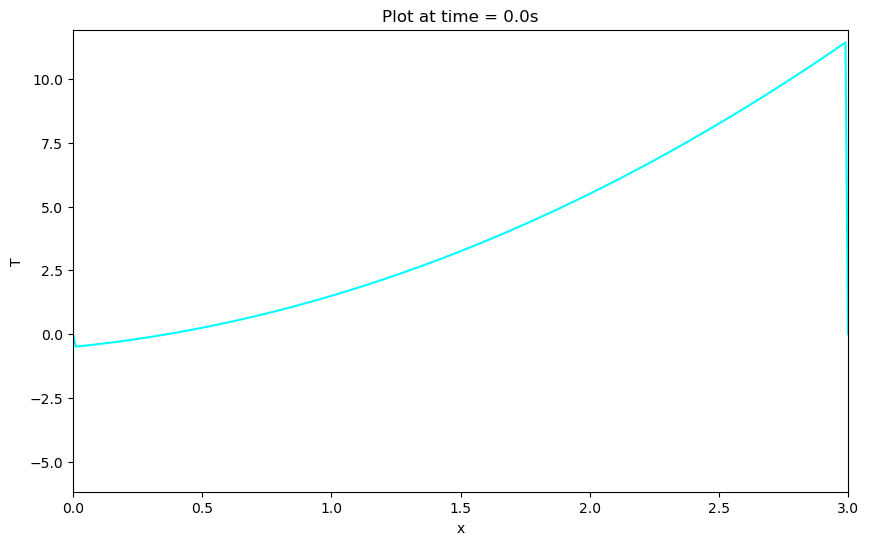

In [49]:
steps_6 = 1
t_min_plot_6 = 0             # default = 0
t_max_plot_6 = 1      # default = len(U_6)
x_min_plot_6 = 0             # default = 0
x_max_plot_6 = L_6           # default = L_6
PDE.PDE_plotter_1D(U_6, L_6, t_max_6, steps_6, t_min_plot_6, t_max_plot_6, x_min_plot_6, x_max_plot_6, alpha_decay=.2)

### *Crank-Nicholson*

In [18]:
# -- User Defined - IC and Boundary condition functions determined at start of notebook
L_6 = 3
t_max_6 = 3

dx_6 = .01
dt_6 = .01

c_6 = .5

# -- Calculated
Nx_6 = int(L_6/dx_6) + 1
Nt_6 = int(t_max_6/dt_6) + 1

x_grid_6 = np.linspace(0,L_6,Nx_6)
t_grid_6 = np.linspace(0,t_max_6,Nt_6)

In [19]:
# Create return array (n x m matrix)
n = len(x_grid_6)
m = len(t_grid_6)
C = np.zeros((m,n))

In [20]:
# Set initial conditions
C[0,:] = f_u_0_x(x_grid_6)

# Set boundary values
C[:,0] = f_u_t_0(0)
C[:,-1] = f_u_t_L(0)

# Check boundary condition agreement - Note analysis can still work if false, but needs to be taken into consideration
print('Boundary and Initial Conditions agreement at x = 0 is',f_u_0_x(0) == f_u_t_0(0))
print('Boundary and Initial Conditions agreement at x = L is',f_u_0_x(L_6) == f_u_t_L(0))

Boundary and Initial Conditions agreement at x = 0 is True
Boundary and Initial Conditions agreement at x = L is True


In [21]:
# Derive the Lambda
alpha = (c_6 * dt_6/dx_6**2)/2

# LHS = A: a tridiagnonal matrix
A = np.diag([2+2*alpha]*(Nt_6-2)) + np.diag([-alpha]*(Nt_6-3),1) + np.diag([-alpha]*(Nt_6-3),-1)

In [22]:
for i in range(0,m-1):
    b = C[i,1:-1].copy() #Need the copy here!
    b[0] = b[0] + alpha**2 * C[i+1,0]
    b[-1] = b[-1] + alpha**2 * C[i+1,-1]
    sol = np.linalg.solve(C,b)
    Ti[i+1,1:-1] = sol

ValueError: solve1: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m)->(m) (size 299 is different from 301)

In [121]:
C.shape

(50001, 301)

## 7a. Klein-Gordon (Nonlinear): $u_{tt} - u_{xx} + u + x^{-6}u^{7}$

In [58]:
# Initial Condition Functions
def f_u_0_x(x):
    '''
    Assigns the initial values (t=0) for u, inner nodes.
    If the initial value is a constant, leave function as-is.
    If the initial value is a function of x, replace return value with function.
    
    Parameters: t = time [Float] 
    '''
    return x*(x-1)

def f_u_t_0(t):
    '''
    Assigns the initial value for the 0-boundary.
    If the boundary is a constant value, leave function as-is.
    If boundary is a function of t, replace return value with function.
    
    Parameters: t = time [Float]    
    '''    
    return 0

def f_u_t_L(t):
    '''
    Assigns the initial value for the L-boundary.
    If the boundary is a constant value, leave function as-is.
    If boundary is a function of t, replace return value with function.
    
    Parameters: t = time [Float] 
    '''
    return 0

In [59]:
def test_1D_nonlinear(u_line,u_line_previous,m,dt,dx):
    '''
    Takes in
    u_line - an 1D array
    u_line_previous - an 1D array
    m - a space index 
    dt - time step
    dx - x step
    
    ***Add notes here about derivation from the centered difference from each side of the equation***
    '''
    x = m * dx
    return (dt**2/dx**2) * (u_line[m+1] + u_line[m-1] - 2*u_line[m]) - dt**2 * u_line[m] + 2 * u_line[m] - (dt**2/x**6) * u_line[m]**7 - u_line_previous[m]

In [60]:
# -- User Defined - IC and Boundary condition functions determined at start of notebook
L_7 = 1
t_max_7 = .5

dx_7 = .002
dt_7 = .002

# -- Create a stability check
if dx_7/dt_7 < 1:
    raise Exception(f"Entered dt is outside of stability range.  Please enter a smaller step size.")

# -- Calculated
Nx_7 = int(L_7/dx_7) + 1
Nt_7 = int(t_max_7/dt_7) + 1

x_grid_7 = np.linspace(0,L_7,Nx_7)
t_grid_7 = np.linspace(0,t_max_7,Nt_7)

# -- Create solution data holder
U_7 = []

# -- Append initial conditions (t = 0) and boundary conditions (x = 0, x = L)
u_t_x_0 = [f_u_0_x(x) for x in x_grid_7]

u_t_x_0[0] = f_u_t_0(0)
u_t_x_0[-1] = f_u_t_L(0)

U_7.append(u_t_x_0)

u_previous_2 = U_7[-1]

for j in range(len(t_grid_7)):
    u_t_x = []
    
    u_previous = U_7[-1]
    
    for m in range(1,len(x_grid_7)-1):
        u = test_1D_nonlinear(u_previous,u_previous_2,m,dt_7,dx_7)
        # Append this value to the time step line
        u_t_x.append(u)
        
    u_previous_2 = u_previous

    # Append the first and last value with boundary conditions (0 in this case)
    u_t_x.insert(0,f_u_t_0(0))
    u_t_x.append(f_u_t_L(0))

    # Now append the full solutions matrix
    U_7.append(u_t_x) 

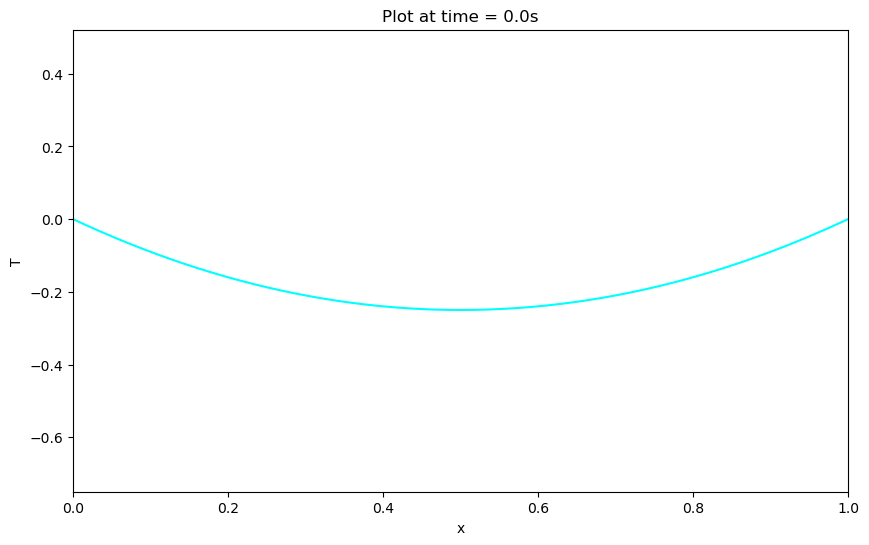

In [61]:
steps_7 = 1
t_min_plot_7 = 0             # default = 0
t_max_plot_7 = 1            # default = len(U_7)
x_min_plot_7 = 0            # default = 0
x_max_plot_7 = L_7            # default = t_max
PDE.PDE_plotter_1D(U_7, L_7, t_max_7, steps_7, t_min_plot_7, t_max_plot_7, x_min_plot_7, x_max_plot_7, alpha_decay = .2)

## 7b. General Klein Gordon Solver - TODO

# To Check:
The graph to the right of the initial wave seems to have the highly oscillatory solutions - check if this is due to the left to right nature of the development of the explicit steps.